In [ ]:
# STEP-BY-STEP INSTRUCTION TO SET UP KAGGLE API IN GOOGLE COLAB
# -------------------------------------------------------------
# 1. First, go to your Kaggle account and create an API token:
#    - Visit: https://www.kaggle.com/account
#    - Scroll down to the "API" section and click "Create New API Token"
#    - This will download a file named `kaggle.json` containing your credentials

# 2. Run the cell below to upload the `kaggle.json` file to Google Colab
from google.colab import files
files.upload()  # This opens a file dialog to upload kaggle.json


In [ ]:
# 3. Set the environment variable so that the kaggle API client knows where to find the token
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'  # This is where the uploaded file goes

# 4. Move the kaggle.json to the default location ~/.kaggle/ and set permissions
!mkdir -p ~/.kaggle                      # Create the kaggle directory if it doesn't exist
!cp /content/kaggle.json ~/.kaggle/     # Copy the uploaded file to the default directory
!chmod 600 ~/.kaggle/kaggle.json        # Set file permissions (required by Kaggle API)


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array
import glob
import matplotlib.pyplot as plt

In [ ]:
import subprocess

# Install kaggle
subprocess.run(["pip", "install", "kaggle"], check=True)

# Download dataset
subprocess.run(["kaggle", "datasets", "download", "vipoooool/new-plant-diseases-dataset"], check=True)

CompletedProcess(args=['kaggle', 'datasets', 'download', 'vipoooool/new-plant-diseases-dataset'], returncode=0)

In [ ]:
!unzip new-plant-diseases-dataset.zip -d plant_diseases_data

Streaming output truncated to the last 5000 lines.
  inflating: plant_diseases_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: plant_diseases_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: plant_diseases_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: plant_diseases_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: plant_diseases_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1

In [ ]:
# Define paths for training and validation
train_dir ="/content/plant_diseases_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/plant_diseases_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
# Image size and batch size
image_size = (128, 128)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
# Define test directory
test_dir = "/content/plant_diseases_data/test/test"

# Get all test image paths
test_image_paths = glob.glob(test_dir + "/*.JPG")

# Preprocess test images
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=(128, 128))  # Resize images to (128, 128)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    test_images.append(img_array)

test_images = np.array(test_images)  # Convert to NumPy array
print(f"Loaded {len(test_images)} test images.")


Loaded 33 test images.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,397,222 (28.22 MB)

 Trainable params: 7,397,222 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=20,  # You can increase this later if needed
    callbacks=[early_stopping]
)



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 107s 46ms/step - accuracy: 0.3305 - loss: 2.4140 - val_accuracy: 0.8039 - val_loss: 0.6909
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.6527 - loss: 1.1139 - val_accuracy: 0.8446 - val_loss: 0.5262
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 93s 42ms/step - accuracy: 0.7197 - loss: 0.8741 - val_accuracy: 0.8500 - val_loss: 0.4790
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 94s 43ms/step - accuracy: 0.7674 - loss: 0.7178 - val_accuracy: 0.8723 - val_loss: 0.3979
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 97s 44ms/step - accuracy: 0.8001 - loss: 0.6045 - val_accuracy: 0.8895 - val_loss: 0.3436
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 93s 42ms/step - accuracy: 0.8235 - loss: 0.5392 - val_accuracy: 0.8867 - val_loss: 0.3567
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 40ms/step - accuracy: 0.8441 - loss: 0.4686 - val_accuracy: 0.8958 - val_loss: 0.3311
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.8582 - loss: 0.

In [ ]:
model.save('plant_disease_model.h5')

In [ ]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9067 - loss: 0.3048
Validation Loss: 0.2962
Validation Accuracy: 0.9109


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


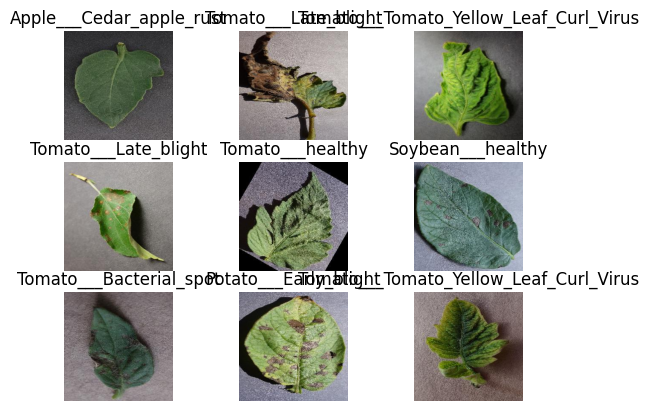

In [ ]:
# Predict on test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_labels = list(train_data.class_indices.keys())
predicted_labels = [class_labels[k] for k in predicted_classes]

# Display some test results
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(test_image_paths[i]))
    plt.title(predicted_labels[i])
    plt.axis('off')
plt.show()

In [ ]:
# Save the model
model.save("plant_disease_model.h5")